<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 

## Lab - K-Means Unsupervised Learning

## Guided Practice

Let's perform a k-means clustering analysis on the Iris dataset.

### Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets

import matplotlib
import matplotlib.pyplot as plt 
matplotlib.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline 

In [2]:
iris = pd.read_csv('C:/Users/mjors_000/Desktop/ECON628-01-berenger92/datasets/iris/iris.csv')
iris.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Can we notice any clusters through EDA to help us decide on the K?

Note: Using Sepal Lenght and Sepal Width

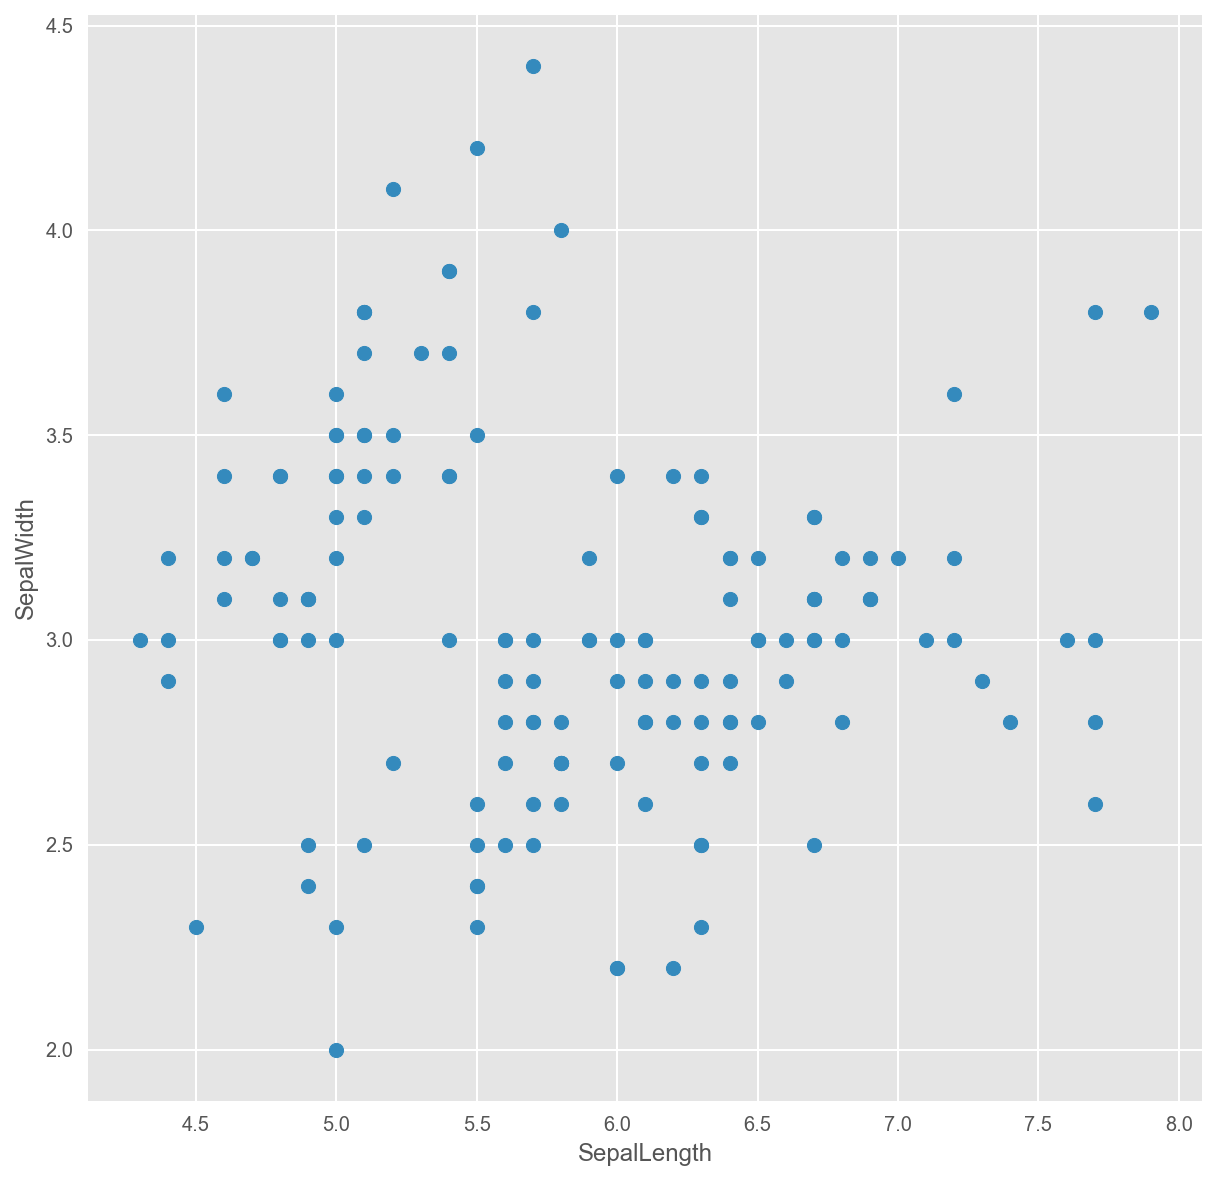

In [3]:
iris.plot(kind="scatter", x="SepalLength", y="SepalWidth", figsize=(10,10), s = 50)
plt.show()

### Let's check our guesses on number of clusters

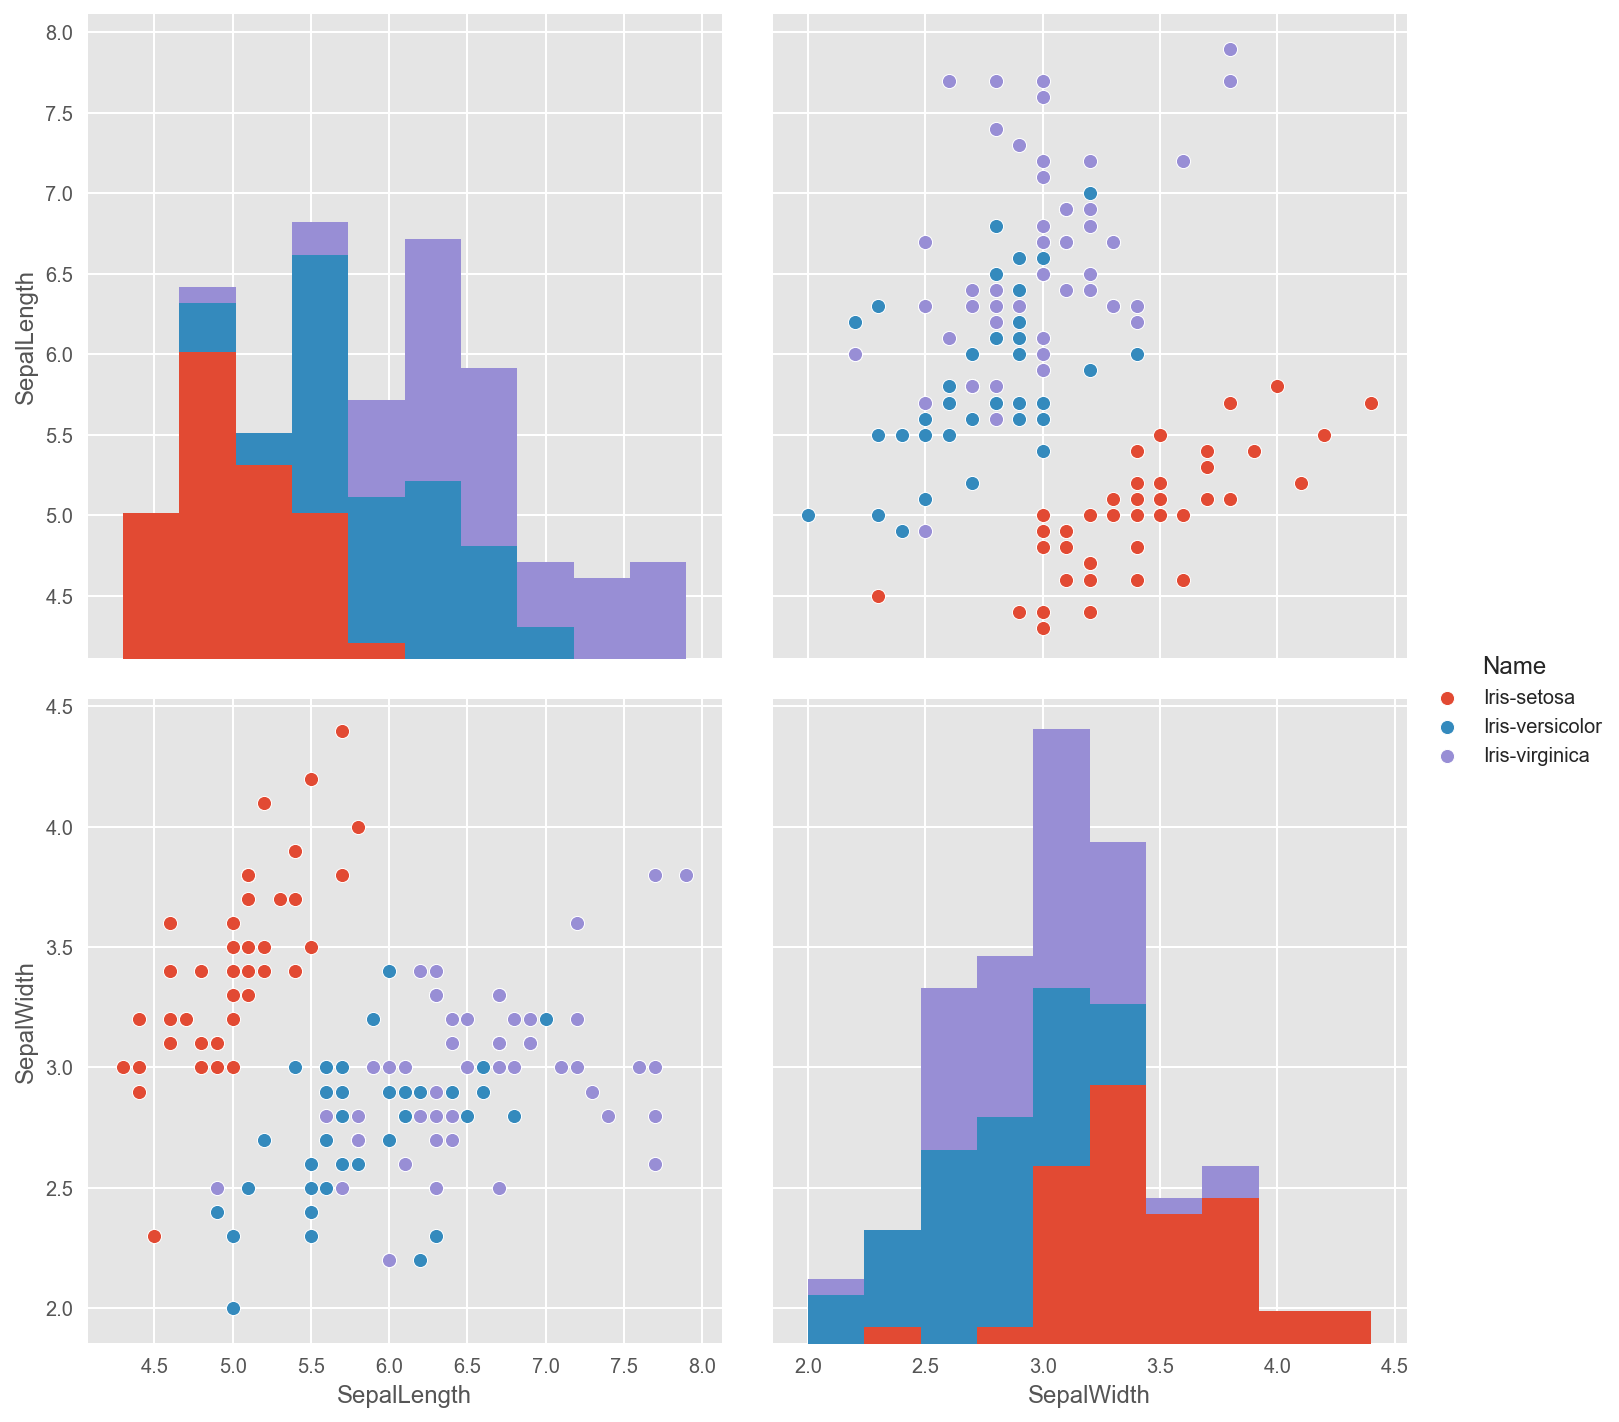

In [4]:
sns.pairplot(iris, hue="Name", size = 5,plot_kws={"s": 50}, vars = ["SepalLength", "SepalWidth"])

### Let's try another example
Note: Using Petal Length and Petal Width

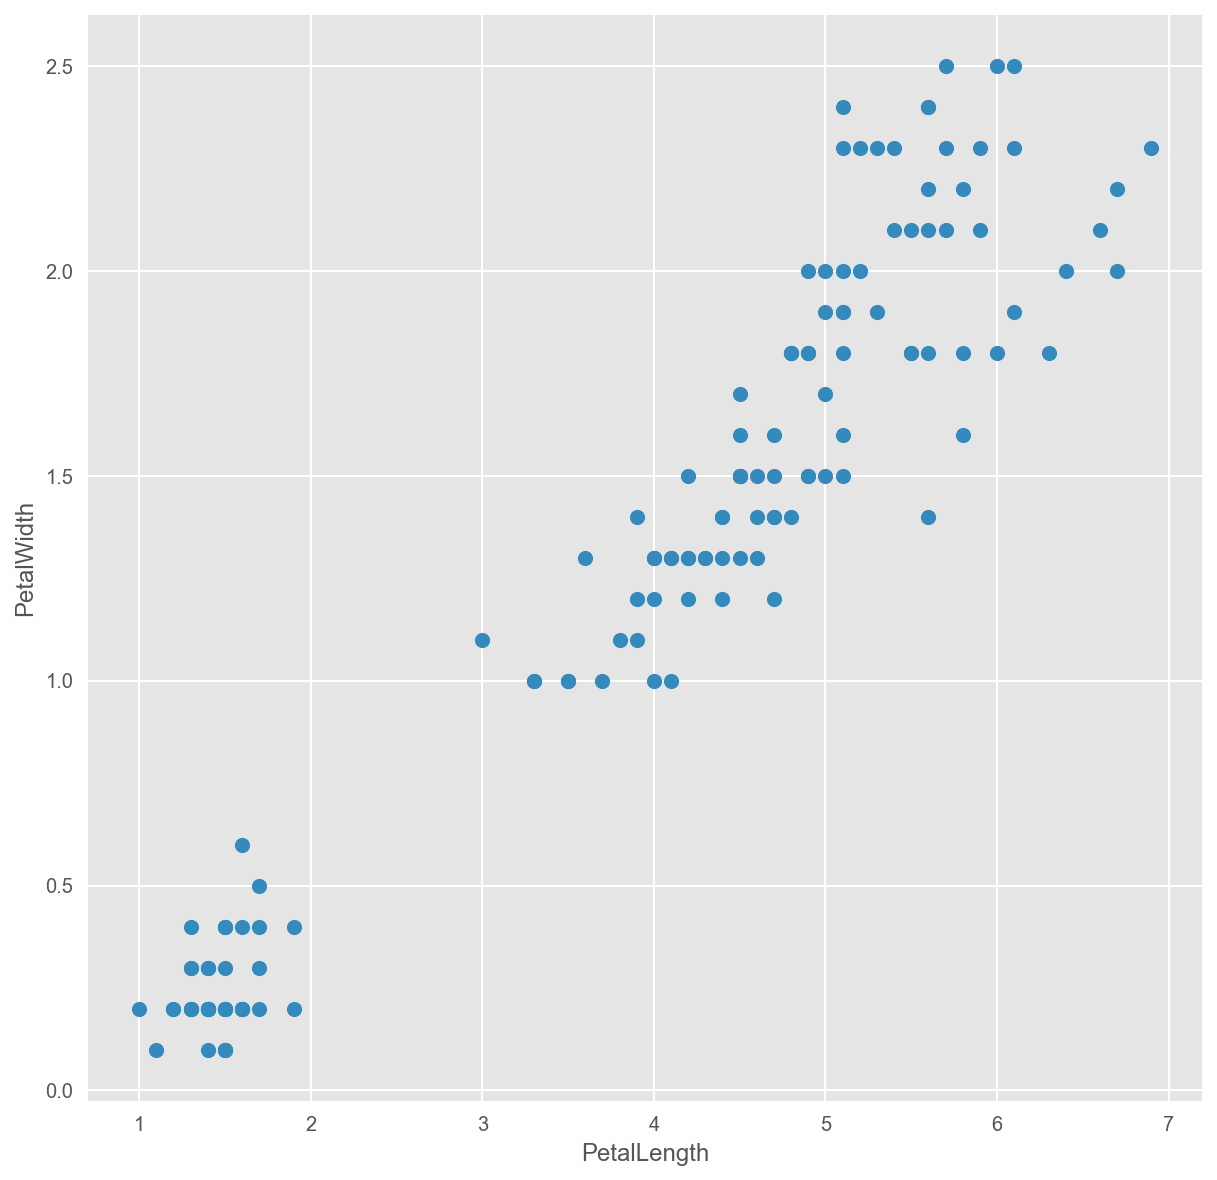

In [5]:
iris.plot(kind="scatter", x="PetalLength", y="PetalWidth", figsize=(10,10), s = 50)
plt.show()

### Check

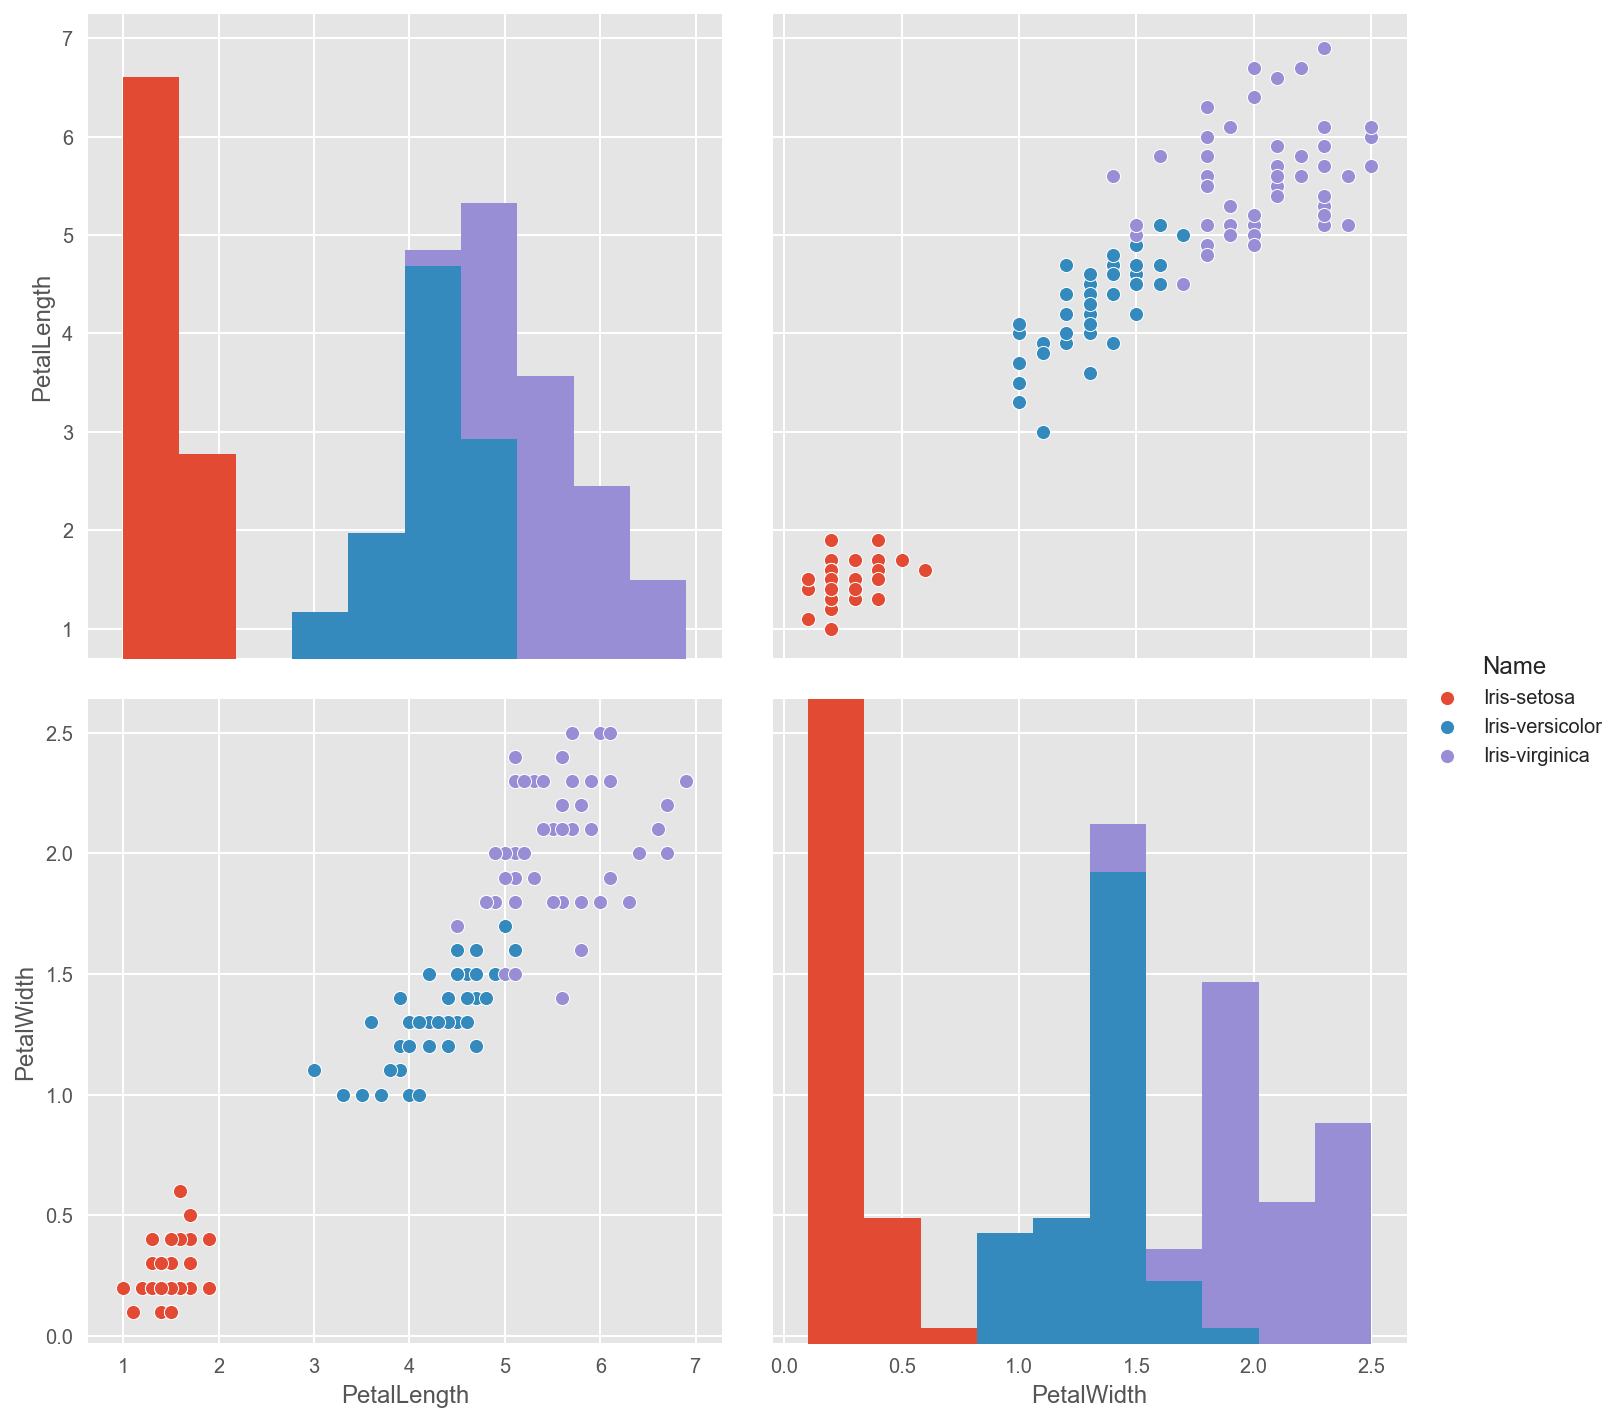

In [6]:
sns.pairplot(iris, hue="Name", size = 5,plot_kws={"s": 50}, vars = ["PetalLength", "PetalWidth"])

### Overall Picture

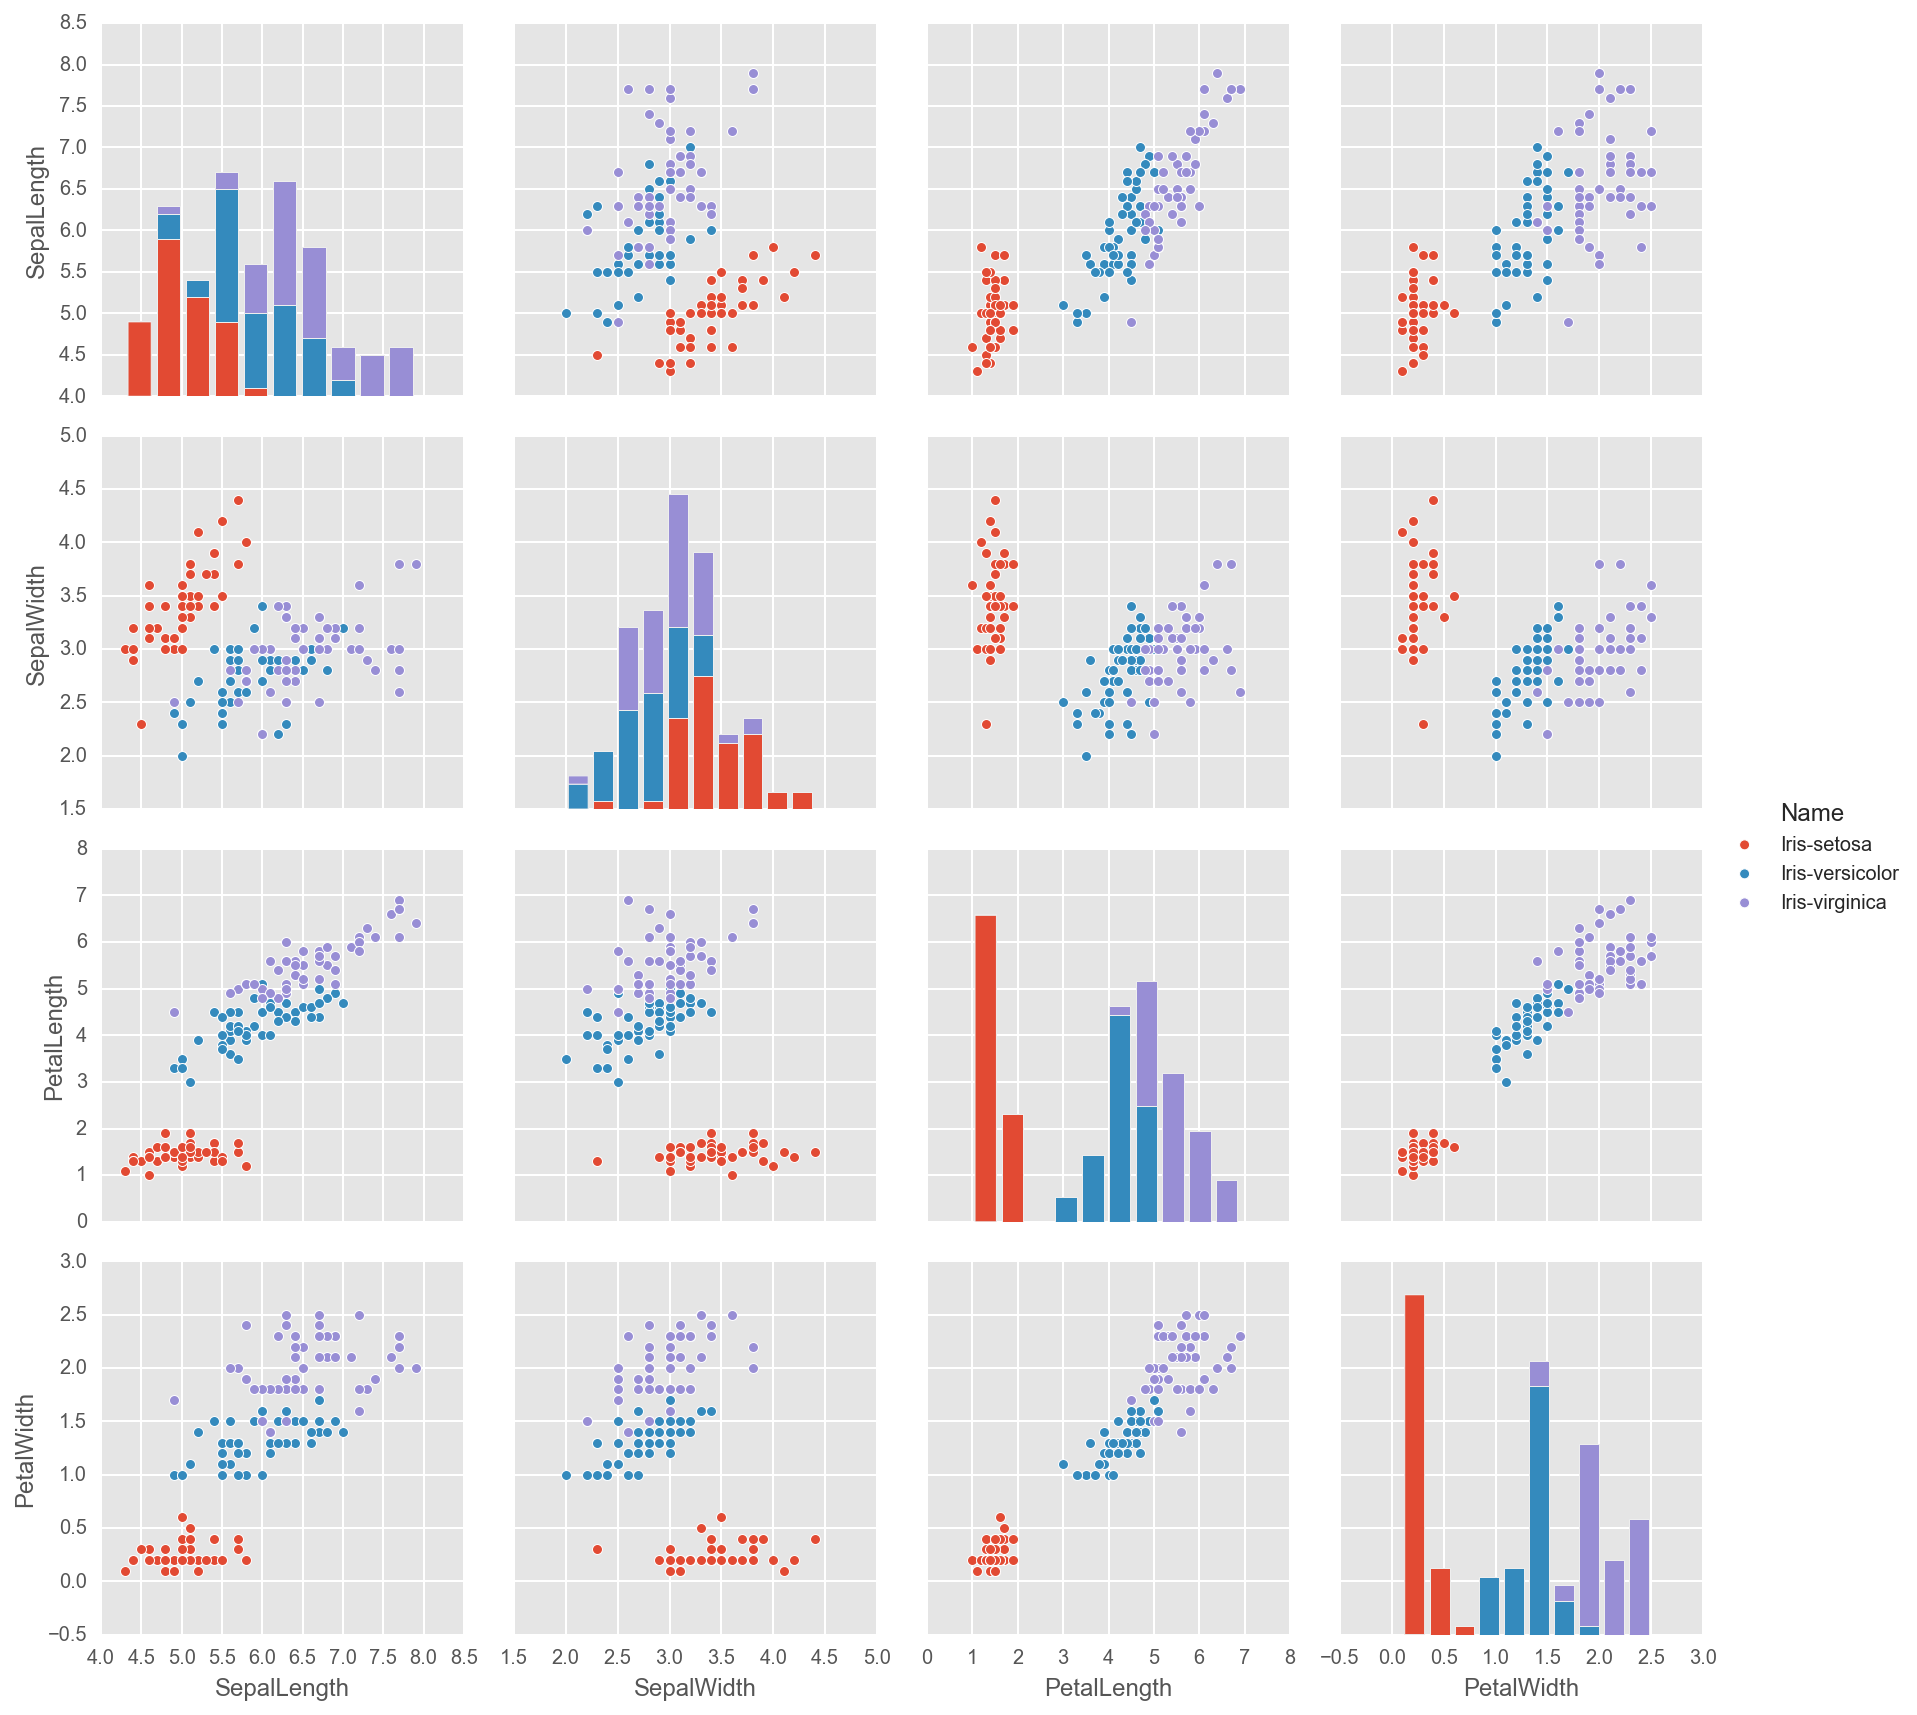

In [7]:
sns.pairplot(iris, hue="Name", plot_kws={"s": 25}, size = 3)

We can see that regardless of what factors we plot, there seems to be two distinct clusters emerging - this will help us with the next portion of our analysis: running the k-means test.

### Necessary pre-processing

In [7]:
#Let's convert our data into a pandas dataframe for our analysis:

df = pd.DataFrame(data=iris, columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'])

Our dataset has the categorical column Name in it, so we'll to convert this columns to numeric data for the k-means algorithm to accept it. Typically, that would take a simple if statement to for all of the values in the categorical column. For this dataset, the name column has Iris-setosa, Iris-virginica, and Iris-versicolor as attributes.

In [8]:
#Creating a function to convert categorical values to numeric

def name_to_numeric(x):
    if x=='Iris-setosa':
        return 1
    if x=='Iris-virginica':
        return 2
    if x=='Iris-versicolor':
        return 3

In [9]:
#Update dataframe by adding new column name_num

df['name_num'] = df['Name'].apply(name_to_numeric)
del df['Name']
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,name_num
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [10]:
#Checking to see if the column name_name worked properly

df.name_num.unique()

array([1, 3, 2], dtype=int64)

## Guided Practice: Perform K-Means Clustering

Before we perform k-means test, we need to transform our dataframe into a Numpy Array:

In [11]:
df.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,name_num
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [12]:
#Created a variable that contains entire dataframe in matrix formation

dn = df.as_matrix(columns=None)
dn[0:10]

array([[ 5.1,  3.5,  1.4,  0.2,  1. ],
       [ 4.9,  3. ,  1.4,  0.2,  1. ],
       [ 4.7,  3.2,  1.3,  0.2,  1. ],
       [ 4.6,  3.1,  1.5,  0.2,  1. ],
       [ 5. ,  3.6,  1.4,  0.2,  1. ],
       [ 5.4,  3.9,  1.7,  0.4,  1. ],
       [ 4.6,  3.4,  1.4,  0.3,  1. ],
       [ 5. ,  3.4,  1.5,  0.2,  1. ],
       [ 4.4,  2.9,  1.4,  0.2,  1. ],
       [ 4.9,  3.1,  1.5,  0.1,  1. ]])

We're all set and ready to go. 


Our data is formatted and now we can cluster.


We're going to set k at 2 (as seen before from our graphs)

In [13]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(dn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print "Labels:", labels
print ""
print "Centroids:", centroids

Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]

Centroids: [[ 6.262  2.872  4.906  1.676  2.5  ]
 [ 5.006  3.418  1.464  0.244  1.   ]]


In [15]:
#Calculating the culsters' silhouette coefficient:

metrics.silhouette_score(dn, labels, metric='euclidean')

0.6956509321199762

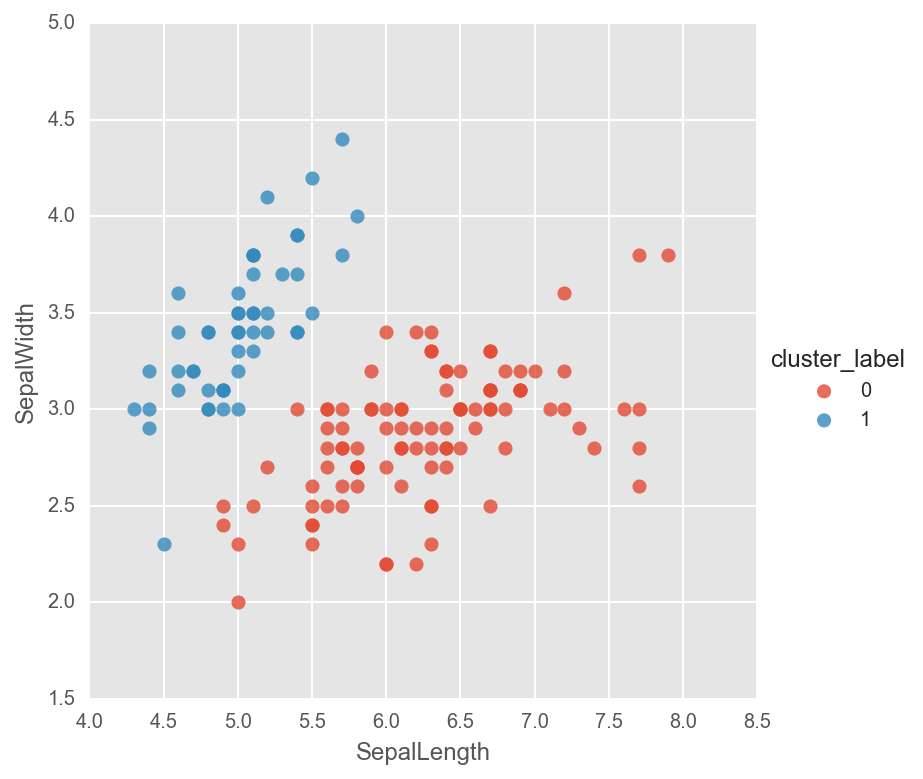

In [17]:
#Plot clusters

df['cluster_label'] = labels
sns.lmplot(
    x = 'SepalLength',
    y = 'SepalWidth',
    hue = 'cluster_label',
    data = df,
    size = 5.5,
    scatter_kws={"s": 50},
    fit_reg=False
);

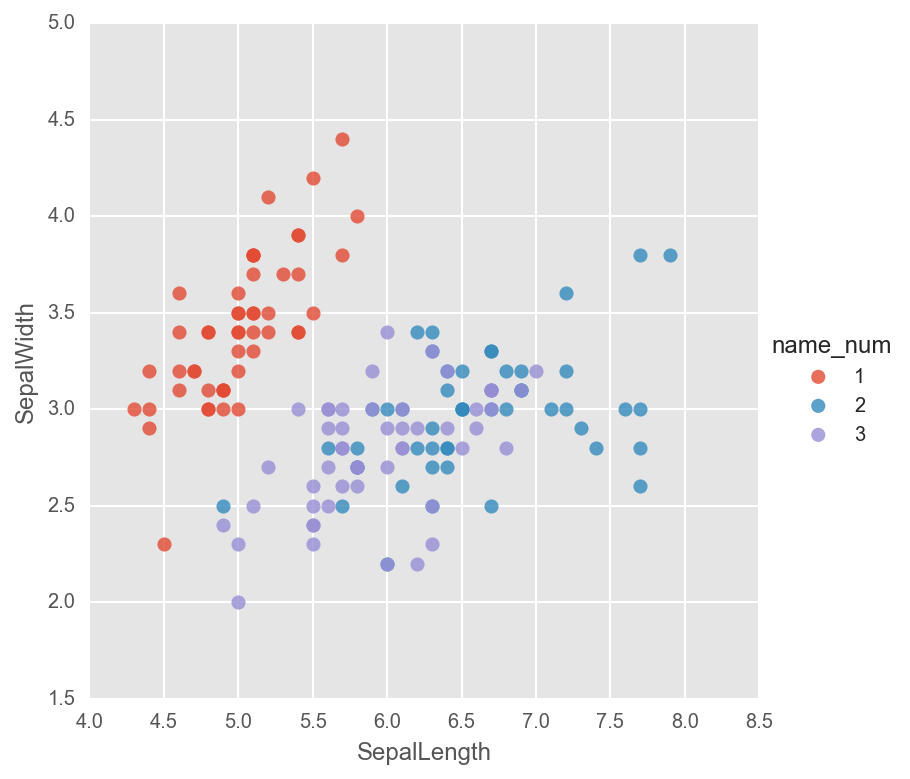

In [18]:
#Compare to actual clusters

sns.lmplot(
    x = 'SepalLength',
    y = 'SepalWidth',
    hue = 'name_num',
    data = df,
    size = 5.5,
    scatter_kws={"s": 50},
    fit_reg=False
);

### Done! Completed culstering analysis

## Independent Practice

### Load the Data

You can find the data under the datasets folder. CSV: **mtcars.csv**

In [16]:
df= pd.read_csv('C:/Users/mjors_000/Desktop/ECON628-01-berenger92/datasets/mtcars/mtcars.csv')
df.head(2)

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


### Plot the Data

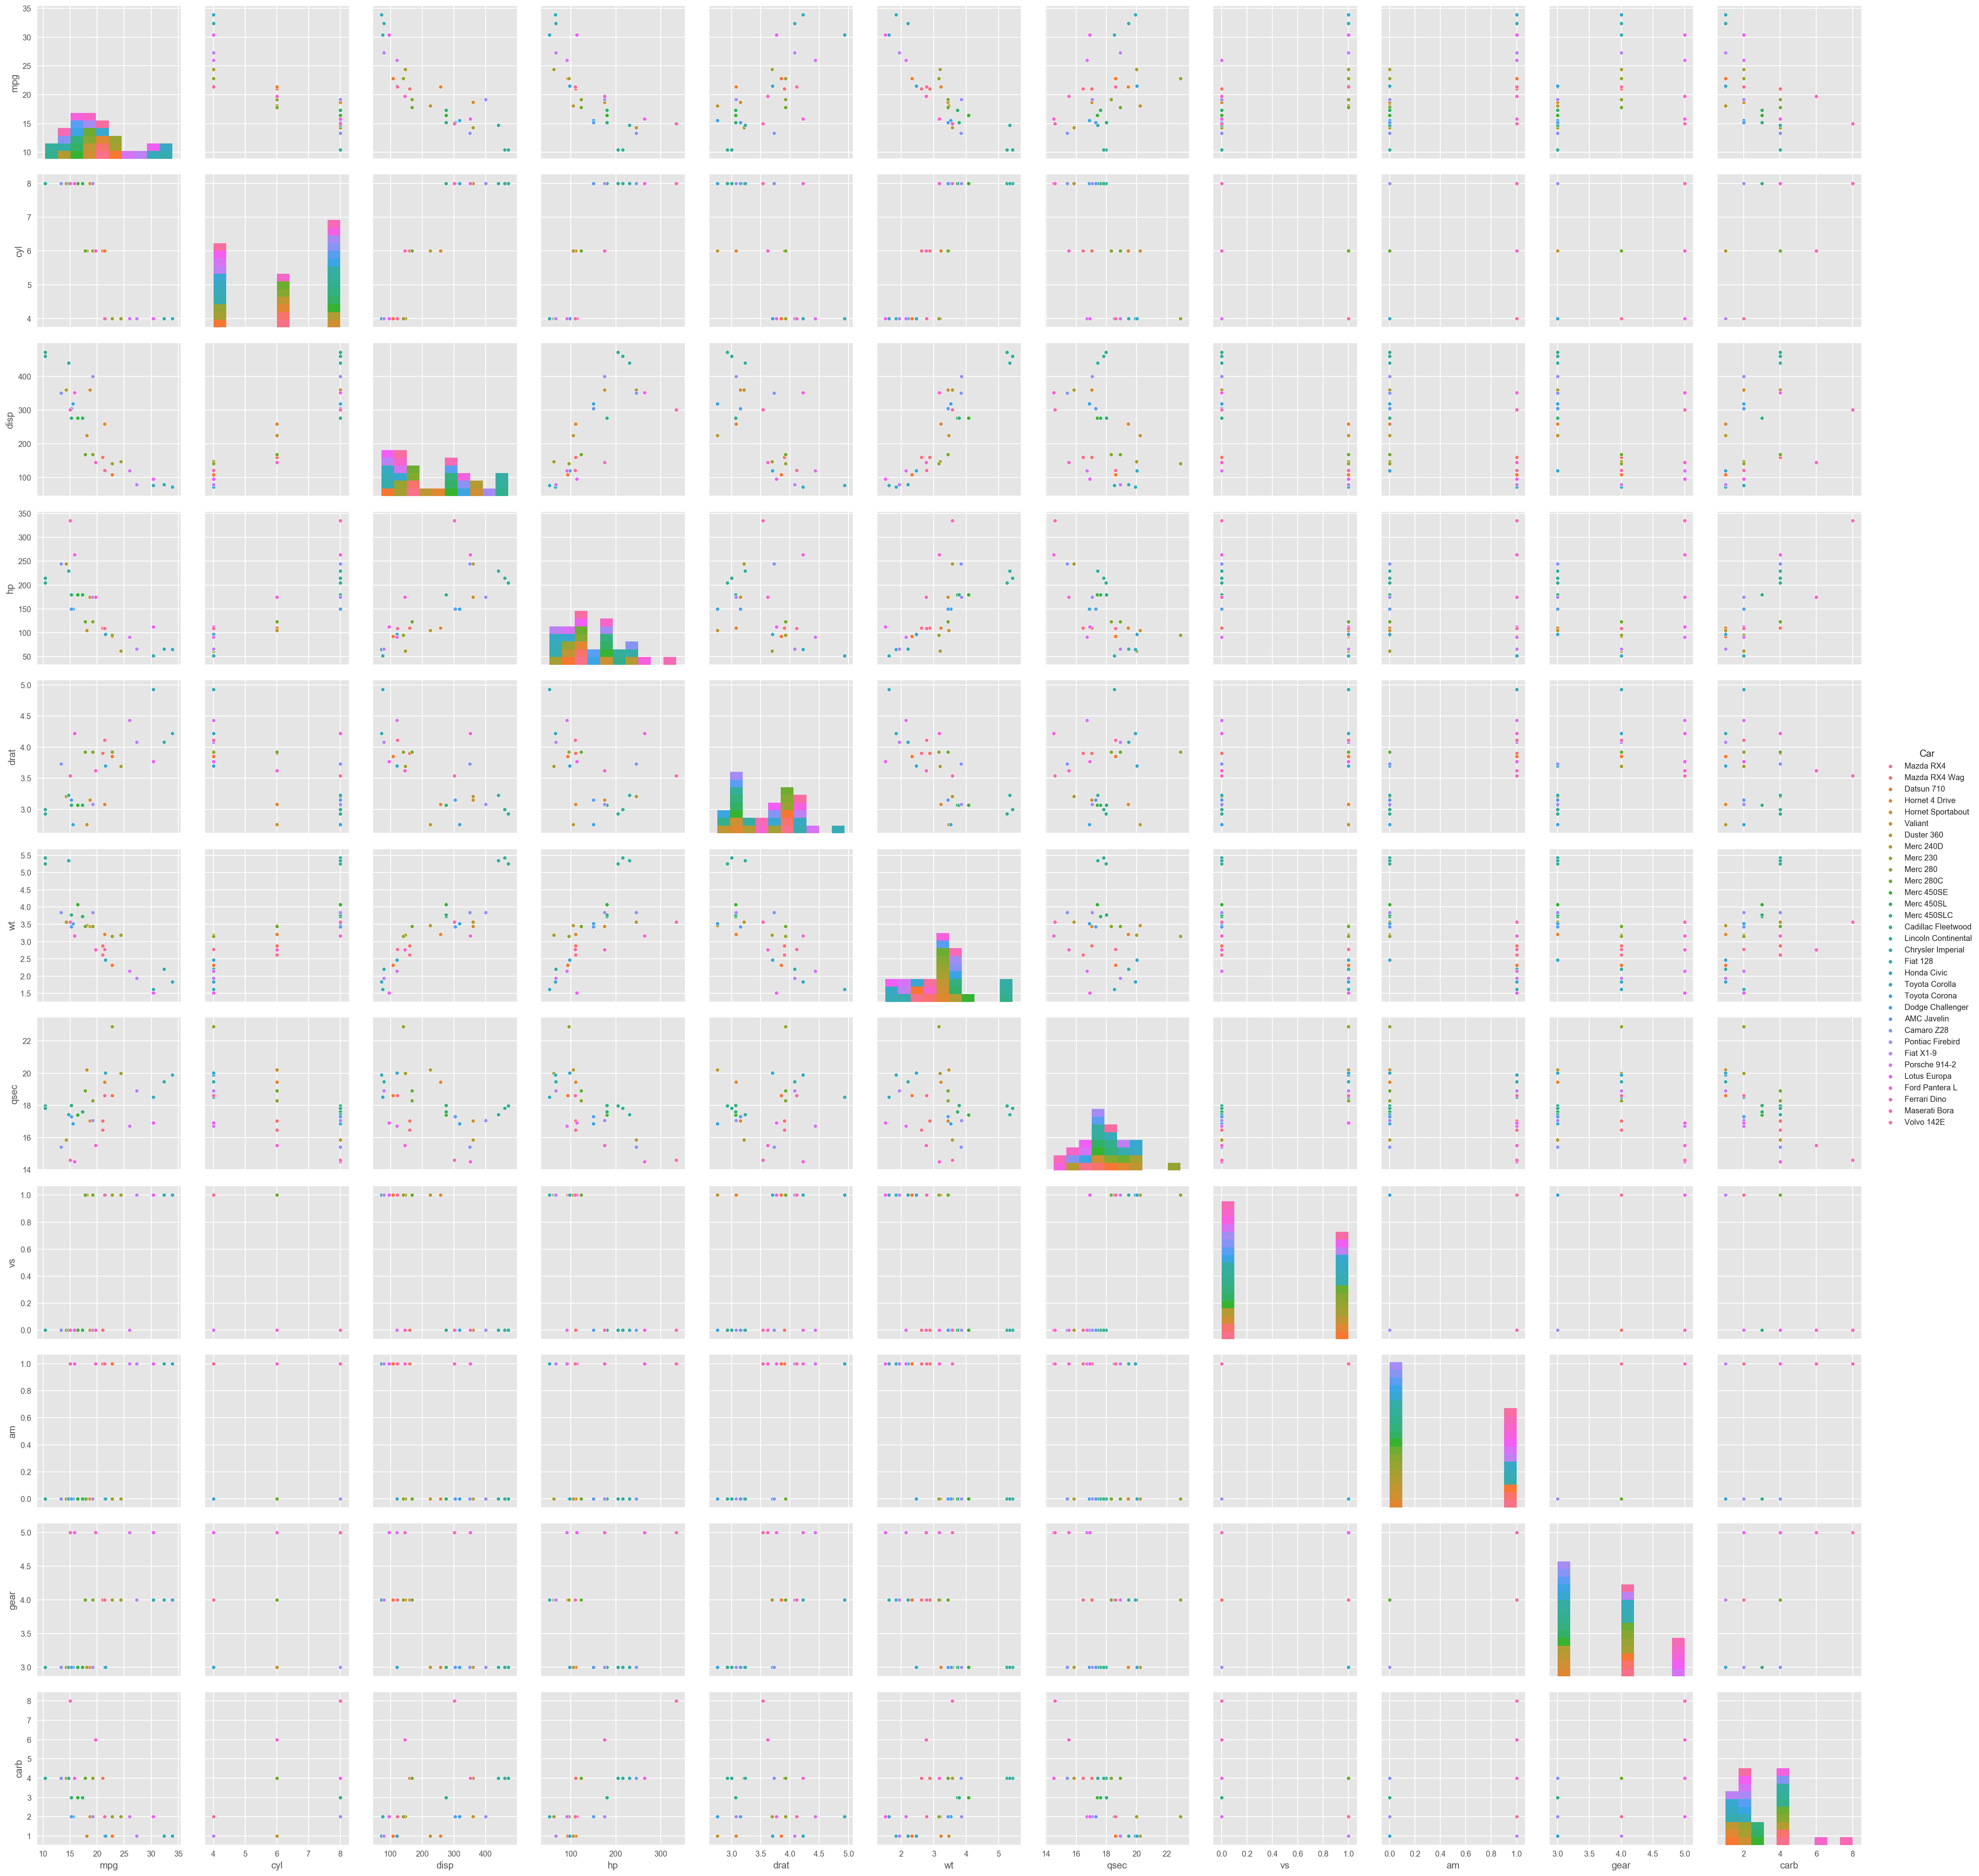

In [23]:
sns.pairplot(df, hue="Car", plot_kws={"s": 25}, size = 3)

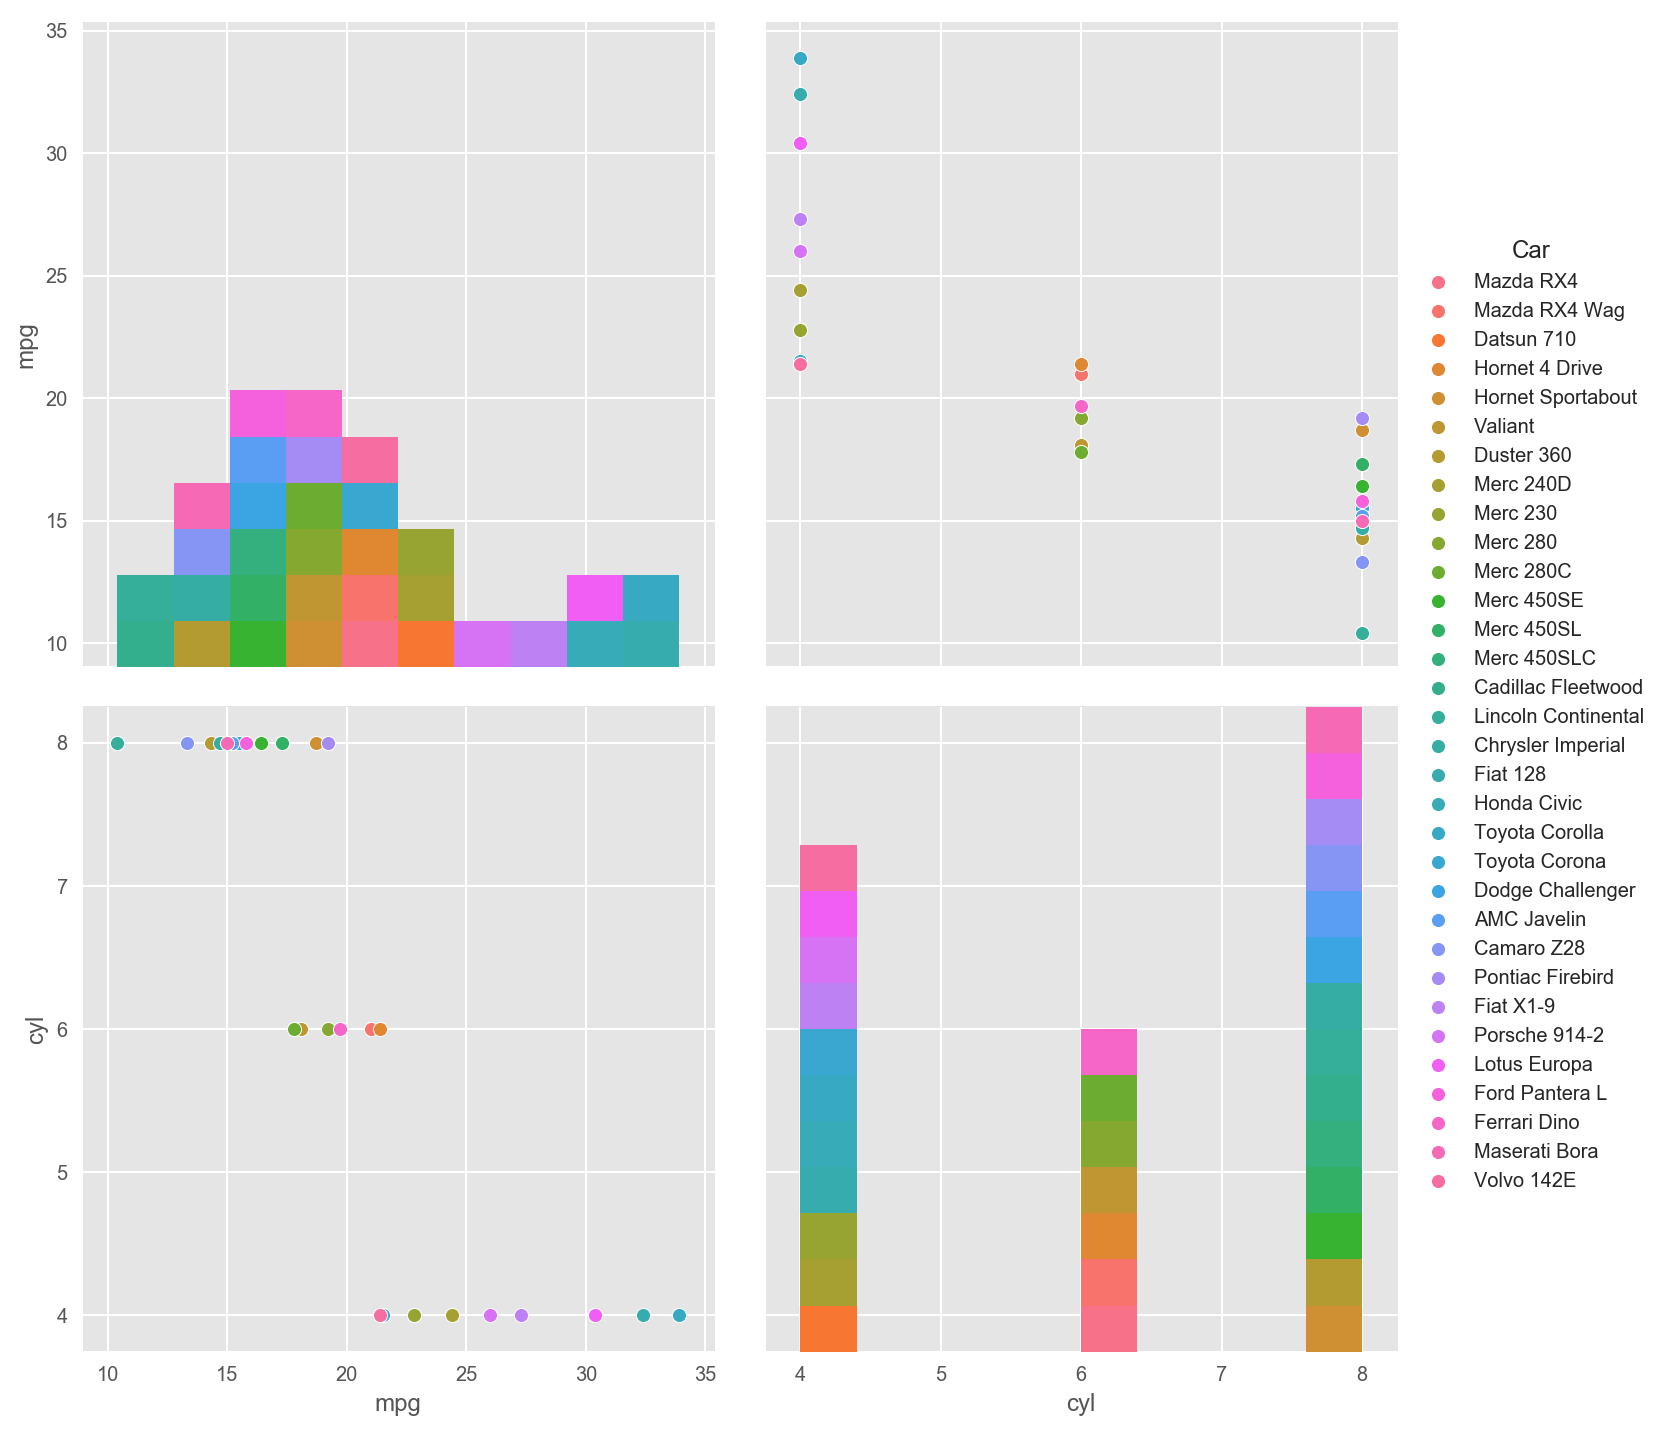

In [22]:
sns.pairplot(df, hue="Car", size = 5,plot_kws={"s": 50}, vars = ["mpg","cyl"])

### Extract the features you will use in clutering into matrix formation

### Cluster the data using K-Means Clustering

### Find the Silhoutte Score and plot the features and clusters

### Cluster the data using K-Means Clustering
Choose two of the variables of your choice to cluster.


1. Create a list of K values ranging from 1 to 10
2. Fit KMeans for every K value iteratively
3. In each iteration, store the Silhoutte score in a list and the inertial in a list (inertial: sum of distances of samples to their closest cluster center)
4. Plot a Inertial vs. Cluster Number plot
5. Which K values leads to the best performance?